# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

# Read the Excel file into a pandas DataFrame
df1 = pd.read_csv('FERTILITY.csv')

# Now you have the table data in a pandas DataFrame object (df)
df1.head(5)

print(df1.columns)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Index(['Year;Fertility'], dtype='object')


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
FERT = pd.read_csv('FERTILITY.csv',delimiter=';')
GDP = pd.read_csv('GDP.csv',delimiter=';')
INF = pd.read_csv('Inflation.csv',delimiter=';')


FERT.drop(range(0,17),inplace=True)

Fertility = FERT['Fertility'].values
Puncturation = [i.replace(',','.') for i in Fertility] 
Fertilityrate = list(map(float,Puncturation))
FERT = FERT.reset_index(drop=True)
FERT = pd.concat([FERT,pd.DataFrame(Puncturation,columns=['Fertilityrate'])],axis=1)
FERT = FERT.drop(columns=['Fertility'])

GDproduct = GDP['Real GDP'].values
Puncturation = [i.replace(',','.') for i in GDproduct]
GrossDP = list(map(float,Puncturation))
GDP = GDP.reset_index(drop=True)
GDP = pd.concat([GDP,pd.DataFrame(Puncturation,columns=['GrossDP'])],axis=1)
GDP = GDP.drop(columns=['Real GDP'])

Inflation = INF['Inflation'].values
Puncturation = [i.replace(',','.') for i in Inflation]
Inflationrate = list(map(float,Puncturation))
INF = INF.reset_index(drop=True)
INF = pd.concat([INF,pd.DataFrame(Puncturation,columns=['Inflationrate'])],axis=1)
INF = INF.drop(columns=['Inflation'])



In [24]:
FERT.head(5)




,Year,Fertilityrate
0,2003,1759.9
1,2004,1785.2
2,2005,1802.1
3,2006,1847.6
4,2007,1843.5


In [25]:
INF.head(5)

,Year,Inflationrate
0,2003,1.7
1,2004,0.9
2,2005,1.5
3,2006,1.6
4,2007,1.5


In [26]:
GDP.head(5)

,Year,GrossDP
0,2003,1705.5
1,2004,1751
2,2005,1792
3,2006,1862.1
4,2007,1879


In [47]:
#merge
Alldata = pd.merge(FERT,GDP,on='Year',how='outer')
Alldata = pd.merge(Alldata,INF,on='Year',how='outer')
Alldata.head(20)

,Year,Fertilityrate,GrossDP,Inflationrate
0,2003,1759.9,1705.5,1.7
1,2004,1785.2,1751,0.9
2,2005,1802.1,1792,1.5
3,2006,1847.6,1862.1,1.6
4,2007,1843.5,1879,1.5
5,2008,1888.8,1869.4,3
6,2009,1839.6,1777.7,1.1
7,2010,1871.2,1810.9,2.1
8,2011,1752.4,1835.1,2.6
9,2012,1729.2,1839.3,2.3


In [48]:
pd.options.display.float_format = '{:.1f}'.format
columns_to_describe = ['Fertilityrate', 'GrossDP', 'Inflationrate']
description = Alldata[columns_to_describe].describe(include='all')
print(description)



       Fertilityrate GrossDP Inflationrate
count             21      21            21
unique            21      21            16
top           1759.9  1705.5           0.8
freq               1       1             3


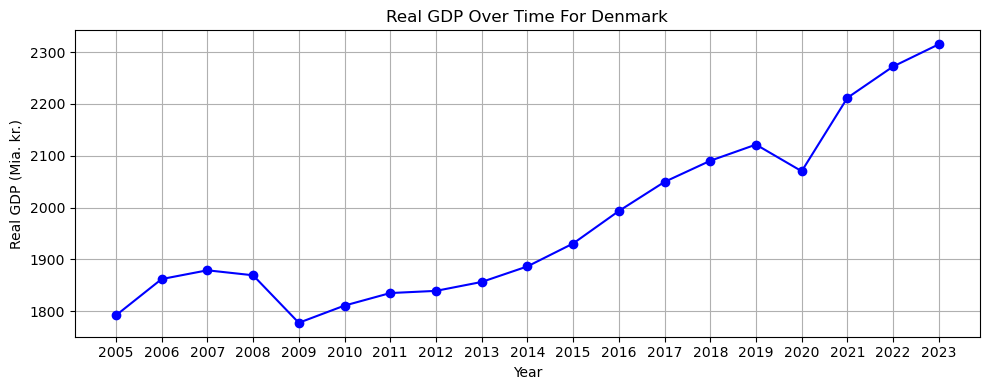

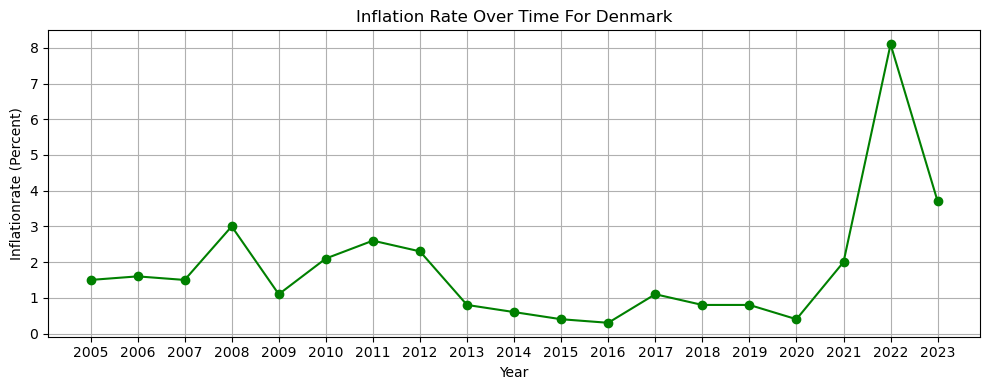

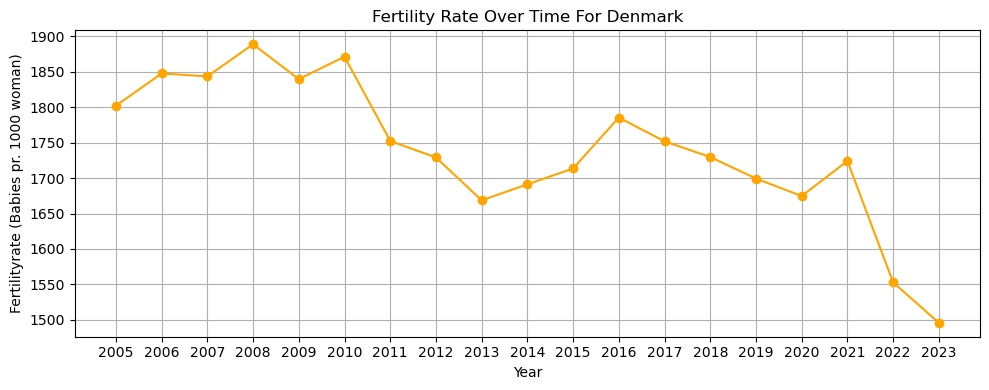

In [80]:
import matplotlib.pyplot as plt

# Convert 'Year' column to integer if it's stored as string
Alldata['Year'] = pd.to_numeric(Alldata['Year'], errors='coerce')
# Convert other columns to numeric type
Alldata['GrossDP'] = pd.to_numeric(Alldata['GrossDP'], errors='coerce')
Alldata['Inflationrate'] = pd.to_numeric(Alldata['Inflationrate'], errors='coerce')
Alldata['Fertilityrate'] = pd.to_numeric(Alldata['Fertilityrate'], errors='coerce')

# Drop rows with NaN values
Alldata.dropna(inplace=True)

# Sort the DataFrame by the 'Year' column
Alldata.sort_values(by='Year', inplace=True)

# Plot GrossDP
plt.figure(figsize=(10, 4))
plt.plot(Alldata['Year'], Alldata['GrossDP'], marker='o', color='blue')
plt.ylabel('Real GDP (Mia. kr.)')
plt.title('Real GDP Over Time For Denmark')
plt.xticks(Alldata['Year'].unique())  # Set x-ticks to unique years
plt.xlabel('Year')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()

# Plot Inflationrate
plt.figure(figsize=(10, 4))
plt.plot(Alldata['Year'], Alldata['Inflationrate'], marker='o', color='green')
plt.ylabel('Inflationrate (Percent)')
plt.title('Inflation Rate Over Time For Denmark')
plt.xticks(Alldata['Year'].unique())  # Set x-ticks to unique years
plt.xlabel('Year')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()

# Plot Fertilityrate
plt.figure(figsize=(10, 4))
plt.plot(Alldata['Year'], Alldata['Fertilityrate'], marker='o', color='orange')
plt.ylabel('Fertilityrate (Babies pr. 1000 woman)')
plt.title('Fertility Rate Over Time For Denmark')
plt.xticks(Alldata['Year'].unique())  # Set x-ticks to unique years
plt.xlabel('Year')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
#Analysis of the data via simple calculations.

# Calculate average GDP
avg_gdp = Alldata['GrossDP'].mean()

# Calculate maximum and minimum GDP
max_gdp = Alldata['GrossDP'].max()
min_gdp = Alldata['GrossDP'].min()

# Calculate average Fertility Rate
avg_fertility = Alldata['Fertilityrate'].mean()

# Calculate average Inflation Rate
avg_inflation = Alldata['Inflationrate'].mean()

# Print the results
print("Average GDP:", avg_gdp)
print("Maximum GDP:", max_gdp)
print("Minimum GDP:", min_gdp)
print("Average Fertility Rate:", avg_fertility)
print("Average Inflation Rate:", avg_inflation)

#A few points: 
#1: Steady ecoonmic growth since after the financial crisis means that Denmark is substancially richer today compared to 20 years ago.
#2: Historically, danish inflation has been low with an average inflation rate of 1.78% over the last 20 years.
    #Highlights the dramatic increase in inflation up to 8% as a result of Covid-19, fiscal stimilus, supply shocks from the war in Ukraine etc.



Average GDP: 1960.7399999999998
Maximum GDP: 2315.2
Minimum GDP: 1751.0
Average Fertility Rate: 1742.355
Average Inflation Rate: 1.78


In [81]:
#Calculating the correlation (Normalised covariance) between GDP and Inflation
correlation_gdp_inflation = Alldata['GrossDP'].corr(Alldata['Inflationrate'])
print("Correlation between GDP and Inflation Rate:", correlation_gdp_inflation)

#A strong positive correlation of 0.42 between GDP and inflation is what we expect to see over a longer period, where cyclical influences are less important. 
    #Higher GDP means higher demand for goods and services which, all other things being equal, drives up the price level. 
    #Not clear from the correlation alone which way the causality runs. (Does GDP determine prices or vice versa?).

Correlation between GDP and Inflation Rate: 0.42117088179963946


In [73]:
import pandas as pd

# Calculate the annual growth rate of GDP
Alldata['GDP_growth'] = Alldata['GrossDP'].pct_change() * 100  # Calculate percentage change in GDP

# Create a new DataFrame with Year and GDP Growth Rate
gdp_growth_data = pd.DataFrame({'Year': Alldata['Year'], 'GDP_growth': Alldata['GDP_growth']})

# Drop the first row since it will have NaN value for growth rate
gdp_growth_data = gdp_growth_data.dropna()

# Print the DataFrame with Year and GDP Growth Rate
print(gdp_growth_data)

#Danish GDP growth has generally been 1-2% over the last 20 years. Negative growth in periods of turmoil like the 2008 crisis or Covid-19.

    Year  GDP_growth
2   2005         2.3
3   2006         3.9
4   2007         0.9
5   2008        -0.5
6   2009        -4.9
7   2010         1.9
8   2011         1.3
9   2012         0.2
10  2013         0.9
11  2014         1.6
12  2015         2.3
13  2016         3.2
14  2017         2.8
15  2018         2.0
16  2019         1.5
17  2020        -2.4
18  2021         6.8
19  2022         2.7
20  2023         1.9


In [76]:
#Easier to understand fertility rates when expressed as babies pr. woman. ( How many  babies does the average woman have).

# Convert Fertilityrate from babies pr. 1000 woman to babies pr. woman and round to 2 decimal places
Alldata['Fertilityrate_per_woman'] = (Alldata['Fertilityrate'] / 1000).round(2)

# Print the header
print("Year\tFertilityrate_per_woman")

# Print the year and the corresponding Fertilityrate_per_woman
for year, fertility in zip(Alldata['Year'], Alldata['Fertilityrate_per_woman']):
    print(f"{year}\t{fertility}")

#As seen below the fertility rate is consistently below 2.1 babies pr. woman, which is the number needed to sustain a constant population without immigration.
    #Furthermore, there is quite a substantial drop of around 0.3 babies pr. woman from 2004 to 2023. Not possible to determine causes from these data alone.
    #Unclear what the effects of low fertility rates are on economic growth. Could slow growth if less people born means less new ideas produced.

Year	Fertilityrate_per_woman
2004	1.79
2005	1.8
2006	1.85
2007	1.84
2008	1.89
2009	1.84
2010	1.87
2011	1.75
2012	1.73
2013	1.67
2014	1.69
2015	1.71
2016	1.79
2017	1.75
2018	1.73
2019	1.7
2020	1.67
2021	1.72
2022	1.55
2023	1.5


In [ ]:
#Conclusion

# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

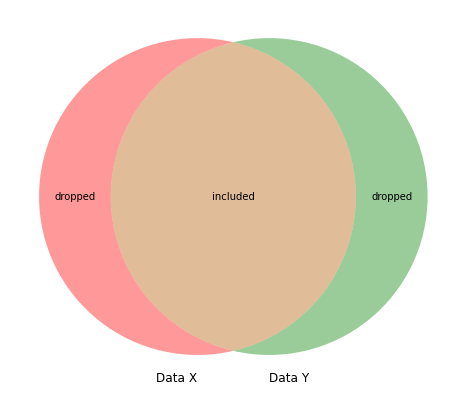

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.